<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/05_logistic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression 또는 Binary Classification 에 사용되는 Data, Label, W, b

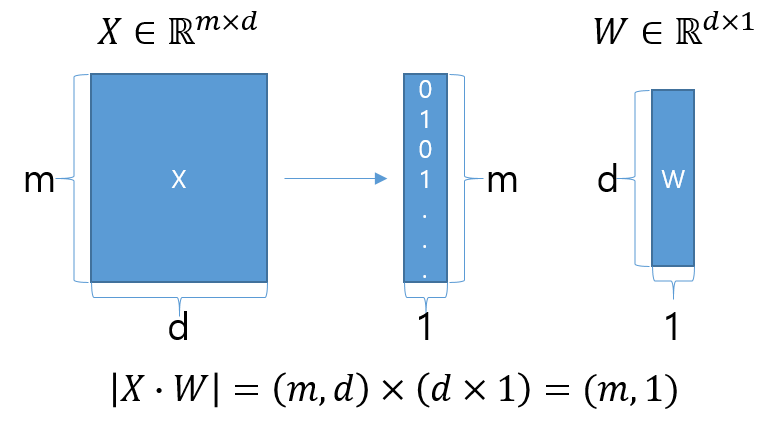

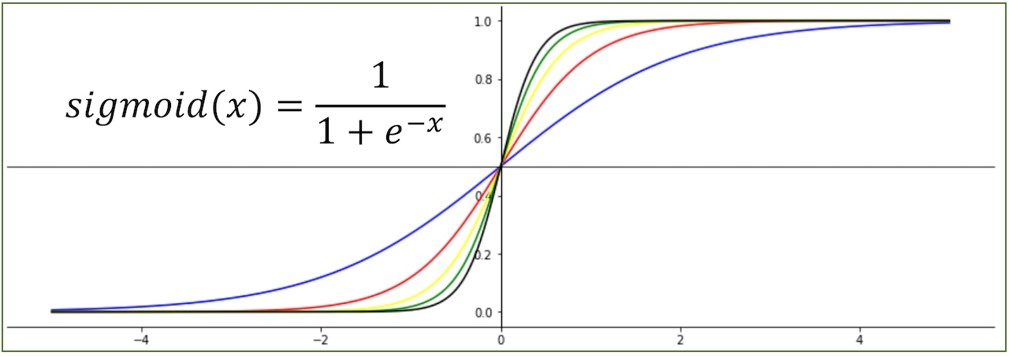

**Hypothesis**

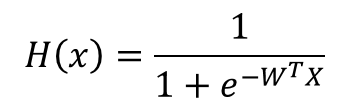

**Hypothesis**

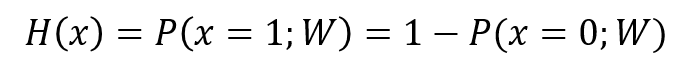

**Cost**

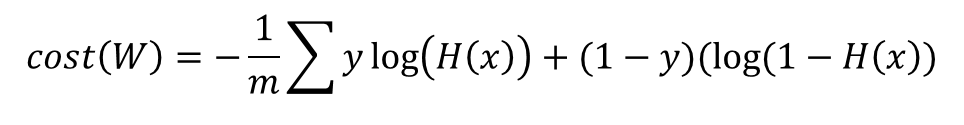

**Weight Update via Gradient Descent**

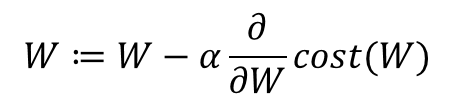

# Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# **Low Level**

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [ ]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


**Hypothesis**

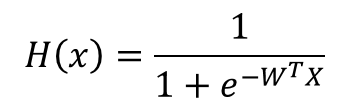

In [ ]:
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


In [ ]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [ ]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


In [ ]:
print('1/(1+e^{-1}) equals: ', torch.sigmoid(torch.FloatTensor([1])))

1/(1+e^{-1}) equals:  tensor([0.7311])


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [ ]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


**Cost**

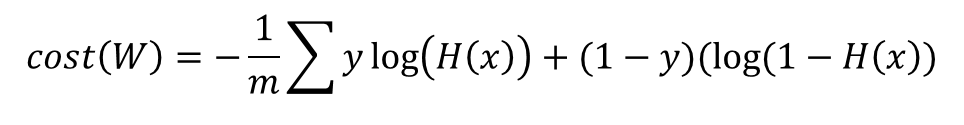

In [ ]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [ ]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [ ]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [ ]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

# **Low Level of Full code**

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


# **Low Level of Full code with `F.binary_crossy_entropy`**

In [ ]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


# **High Level of Full code with `nn.Module`**

In [ ]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [ ]:
model = BinaryClassifier()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/100 Cost: 0.741738 Accuracy 33.33%
Epoch   10/100 Cost: 0.998285 Accuracy 66.67%
Epoch   20/100 Cost: 0.538412 Accuracy 83.33%
Epoch   30/100 Cost: 0.440910 Accuracy 83.33%
Epoch   40/100 Cost: 0.356920 Accuracy 83.33%
Epoch   50/100 Cost: 0.278728 Accuracy 83.33%
Epoch   60/100 Cost: 0.212599 Accuracy 83.33%
Epoch   70/100 Cost: 0.169649 Accuracy 100.00%
Epoch   80/100 Cost: 0.150112 Accuracy 100.00%
Epoch   90/100 Cost: 0.139132 Accuracy 100.00%
Epoch  100/100 Cost: 0.130006 Accuracy 100.00%


# **Checking the Accuracy our Model**

In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward>)


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


In [ ]:
print(prediction[:5])
print(y_train[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [ ]:
correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


In [ ]:
accuracy = correct_prediction.sum().item() / len(correct_prediction)
print('The model has an accuracy of {:2.2f}% for the training set.'.format(accuracy * 100))

The model has an accuracy of 100.00% for the training set.


# Loading Real Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


일반적인 Colab Notebooks 경로

In [ ]:
!ls /gdrive/My\ Drive/Colab\ Notebooks/Pytorch/pytorch_for_everyone/data/

path = '/gdrive/My Drive/Colab Notebooks/data/accidents.txt'
dataset = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [ ]:
import numpy as np
dataset = np.loadtxt('/gdrive/My Drive/Colab Notebooks/Pytorch/pytorch_for_everyone/data/03_diabetes.txt', delimiter=',', dtype=np.float32)
# dataset = pd.read_csv('/gdrive/My\ Drive/Colab\ Notebooks/Pytorch/pytorch_for_everyone/data/01_test_score.csv', delimiter='\t')
print(dataset.shape)
print(dataset[:5])

(759, 9)
[[-0.294118    0.487437    0.180328   -0.292929    0.          0.00149028
  -0.53117    -0.0333333   0.        ]
 [-0.882353   -0.145729    0.0819672  -0.414141    0.         -0.207153
  -0.766866   -0.666667    1.        ]
 [-0.0588235   0.839196    0.0491803   0.          0.         -0.305514
  -0.492741   -0.633333    0.        ]
 [-0.882353   -0.105528    0.0819672  -0.535354   -0.777778   -0.162444
  -0.923997    0.          1.        ]
 [ 0.          0.376884   -0.344262   -0.292929   -0.602837    0.28465
   0.887276   -0.6         0.        ]]


In [ ]:
total = len(dataset)
train_ratio = int(total*0.8)
test_ratio = total - train_ratio

print(total)
print(train_ratio)
print(test_ratio)

759
607
152


In [ ]:
x_data = dataset[:train_ratio, 0:-1]
x_label = dataset[:train_ratio, [-1]]
y_data = dataset[train_ratio:, 0:-1]
y_label = dataset[train_ratio:, [-1]]

x_train = torch.FloatTensor(x_data)
x_train_label = torch.FloatTensor(x_label)
y_train = torch.FloatTensor(y_data)
y_train_label = torch.FloatTensor(y_label)

print(x_train[:5])
print(x_train_label[:5])
print(y_train[:5])
print(y_train_label[:5])

tensor([[-0.2941,  0.4874,  0.1803, -0.2929,  0.0000,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  0.0000,  0.0000, -0.3055, -0.4927, -0.6333],
        [-0.8824, -0.1055,  0.0820, -0.5354, -0.7778, -0.1624, -0.9240,  0.0000],
        [ 0.0000,  0.3769, -0.3443, -0.2929, -0.6028,  0.2846,  0.8873, -0.6000]])
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])
tensor([[-0.6471,  0.0653,  0.1803,  0.0000,  0.0000, -0.2310, -0.8898, -0.8000],
        [-0.2941,  0.1759,  0.5738,  0.0000,  0.0000, -0.1446, -0.9325, -0.7000],
        [-0.7647, -0.3166,  0.0164, -0.7374, -0.9645, -0.4009, -0.8471, -0.9333],
        [ 0.0588,  0.1256,  0.3443, -0.5152,  0.0000, -0.1595,  0.0282, -0.0333],
        [ 0.0000,  0.1960,  0.0000,  0.0000,  0.0000, -0.0343, -0.9462, -0.9000]])
tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.]])


# **Training with `nn.Module`**

In [ ]:
class BinaryClassifier_realdata(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [ ]:
model = BinaryClassifier_realdata()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, x_train_label)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 100 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == x_train_label
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  100/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  200/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  300/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  400/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  500/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  600/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  700/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  800/1000 Cost: 0.469356 Accuracy 78.25%
Epoch  900/1000 Cost: 0.469356 Accuracy 78.25%
Epoch 1000/1000 Cost: 0.469356 Accuracy 78.25%


# **Evaluation**

In [ ]:
hypothesis = model(y_train)
prediction = hypothesis >= torch.FloatTensor([0.5])
correct_prediction = prediction.float() == y_train_label
accuracy = correct_prediction.sum().item() / len(correct_prediction)

print('The model has an accuracy of {:2.2f}% for the training set.'.format(accuracy * 100))

The model has an accuracy of 75.00% for the training set.
